In [ ]:
pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import seaborn as sns

In [ ]:
od.download("https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market/data?select=MELBOURNE_HOUSE_PRICES_LESS.csv")

Skipping, found downloaded files in "./melbourne-housing-market" (use force=True to force download)


In [ ]:
dataset= pd.read_csv("/content/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv")

# EDA DATA

In [ ]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


In [ ]:
# Merubah Date menjadi dtype Date
dataset["Date"]=pd.to_datetime(dataset.loc[:,"Date"],format='%d/%m/%Y')

In [ ]:
# Perubahan Nilai Perhitungan Date
dataset["Date"]=(abs(dataset.loc[0,"Date"]-dataset.loc[:,"Date"])/ np.timedelta64(1, 'D')).astype(int)+1

In [ ]:
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


## Missing Method Feature DropNAN

In [ ]:
selected_dataset=dataset[["Rooms","Type","Method","Price","Distance","Date","Propertycount"]]

In [ ]:
selected_dataset.head()

,Rooms,Type,Method,Price,Distance,Date,Propertycount
0,3,h,S,1490000.0,3.0,1,4019
1,3,h,S,1220000.0,3.0,1,4019
2,3,h,S,1420000.0,3.0,1,4019
3,3,h,S,1515000.0,7.5,1,1543
4,2,h,S,670000.0,10.4,1,3464


In [ ]:
onehot=pd.get_dummies(selected_dataset)

In [ ]:
onehot.head()

,Rooms,Price,Distance,Date,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,3,1490000.0,3.0,1,4019,True,False,False,False,False,True,False,False,False,False,False,False
1,3,1220000.0,3.0,1,4019,True,False,False,False,False,True,False,False,False,False,False,False
2,3,1420000.0,3.0,1,4019,True,False,False,False,False,True,False,False,False,False,False,False
3,3,1515000.0,7.5,1,1543,True,False,False,False,False,True,False,False,False,False,False,False
4,2,670000.0,10.4,1,3464,True,False,False,False,False,True,False,False,False,False,False,False


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >]],
      dtype=object)

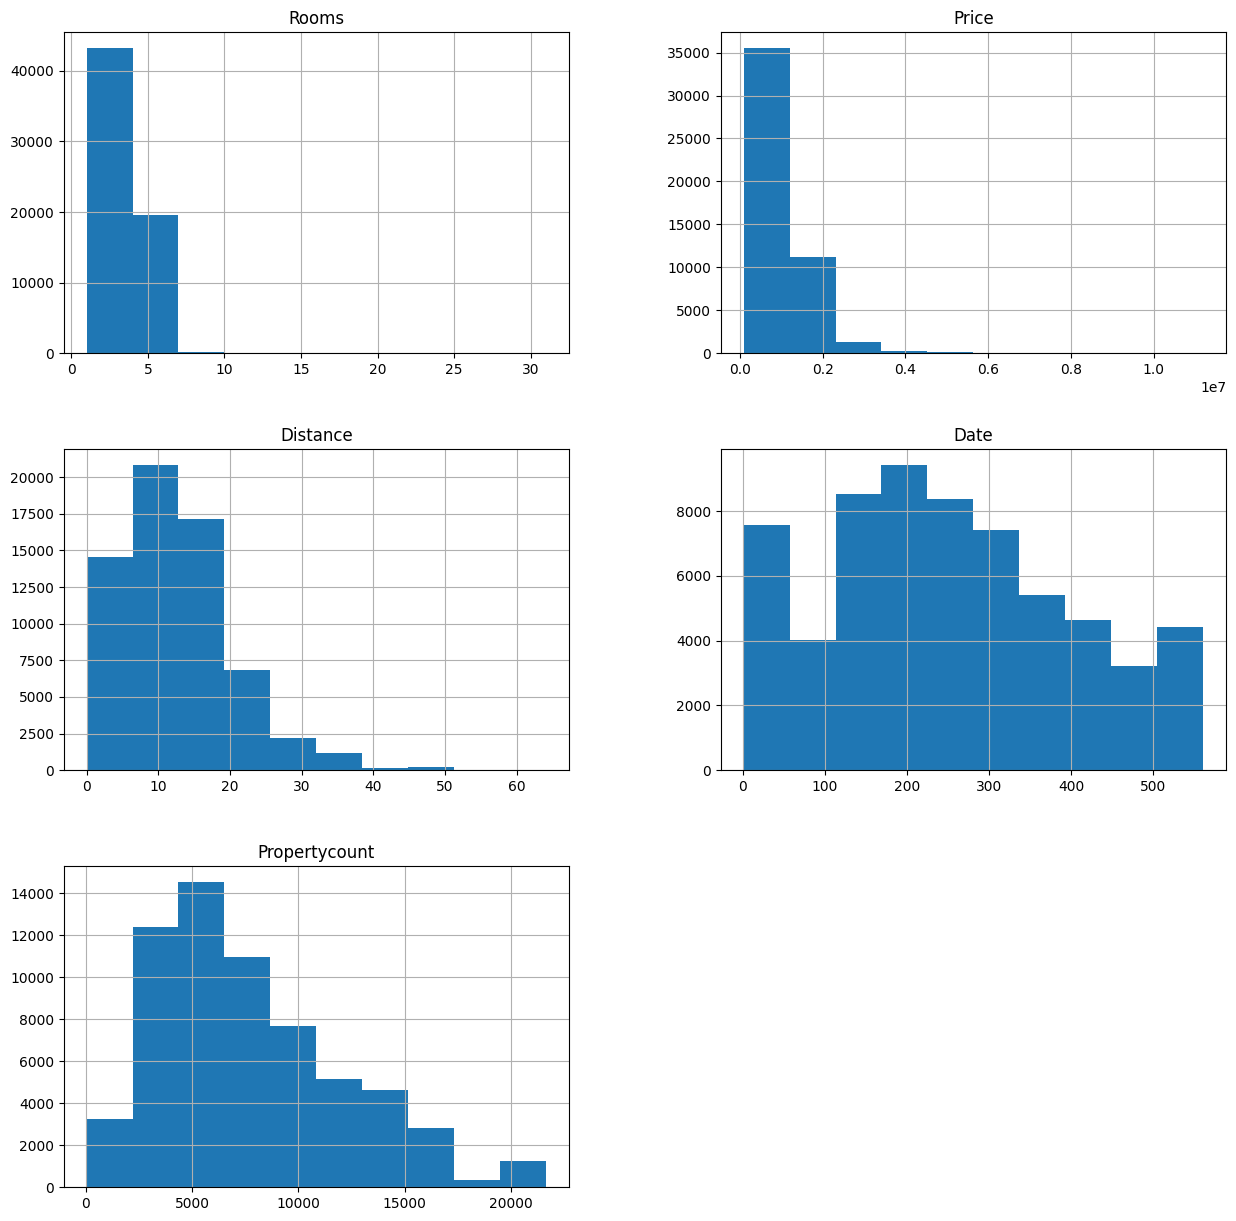

In [ ]:
onehot.hist(figsize=(15,15))

<Axes: >

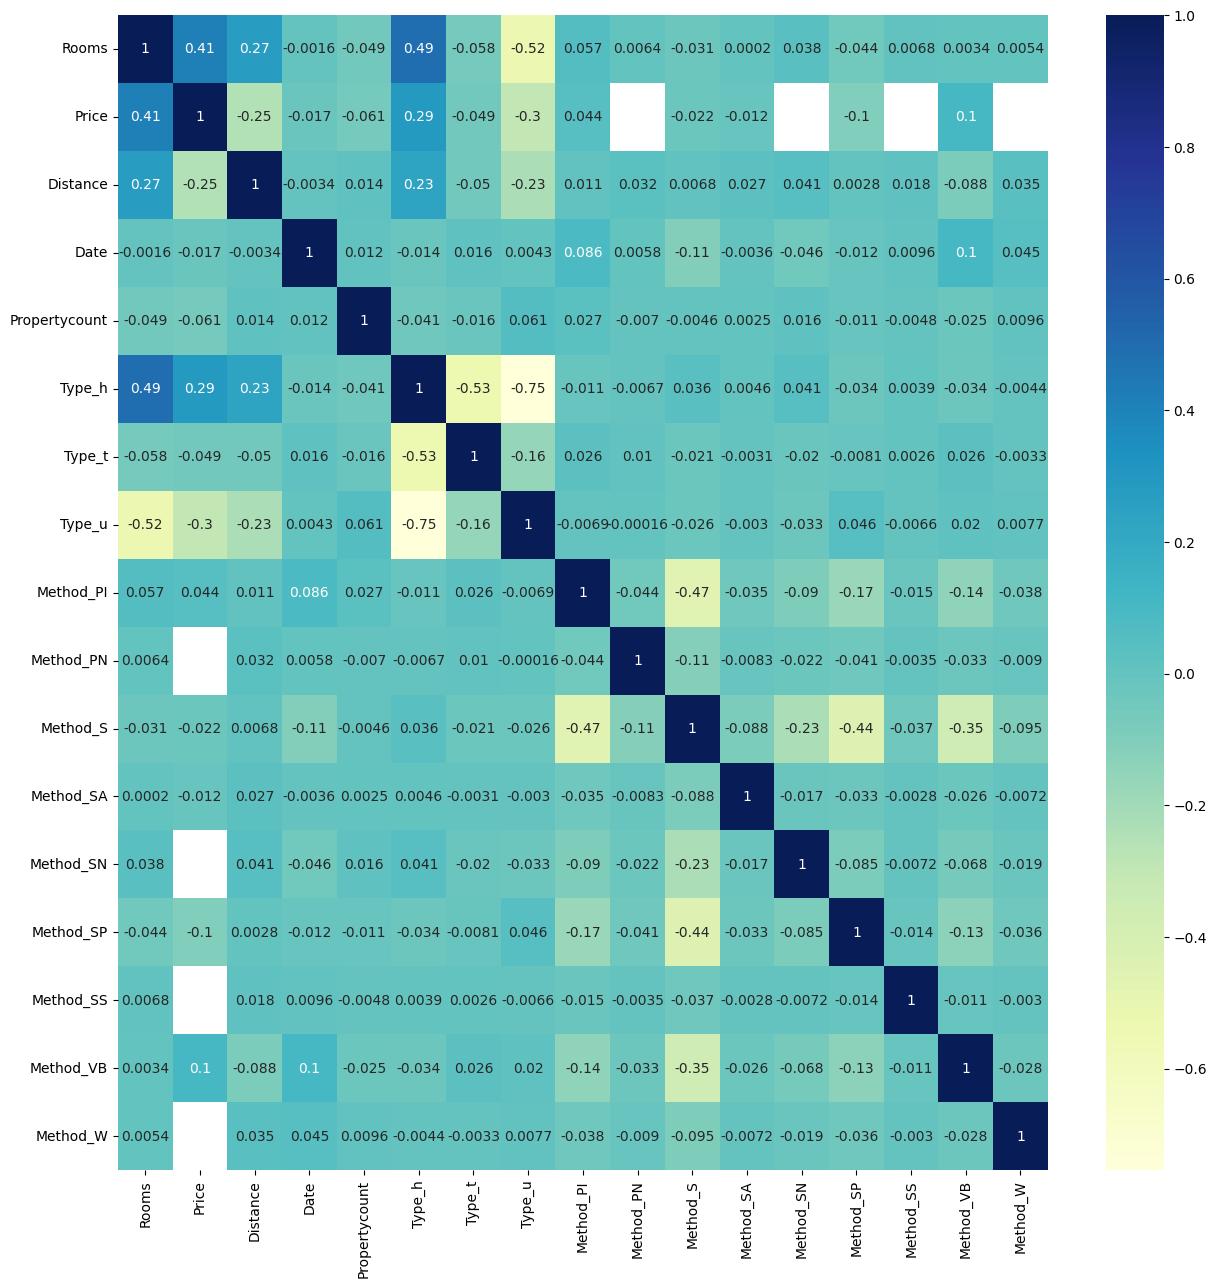

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(onehot.corr(),annot=True,cmap="YlGnBu")

# EDA NO NULL Data

In [ ]:
onehot_nonull=onehot.dropna()

In [ ]:
onehot_nonull.head()

,Rooms,Price,Distance,Date,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,3,1490000.0,3.0,1,4019,True,False,False,False,False,True,False,False,False,False,False,False
1,3,1220000.0,3.0,1,4019,True,False,False,False,False,True,False,False,False,False,False,False
2,3,1420000.0,3.0,1,4019,True,False,False,False,False,True,False,False,False,False,False,False
3,3,1515000.0,7.5,1,1543,True,False,False,False,False,True,False,False,False,False,False,False
4,2,670000.0,10.4,1,3464,True,False,False,False,False,True,False,False,False,False,False,False


<Axes: >

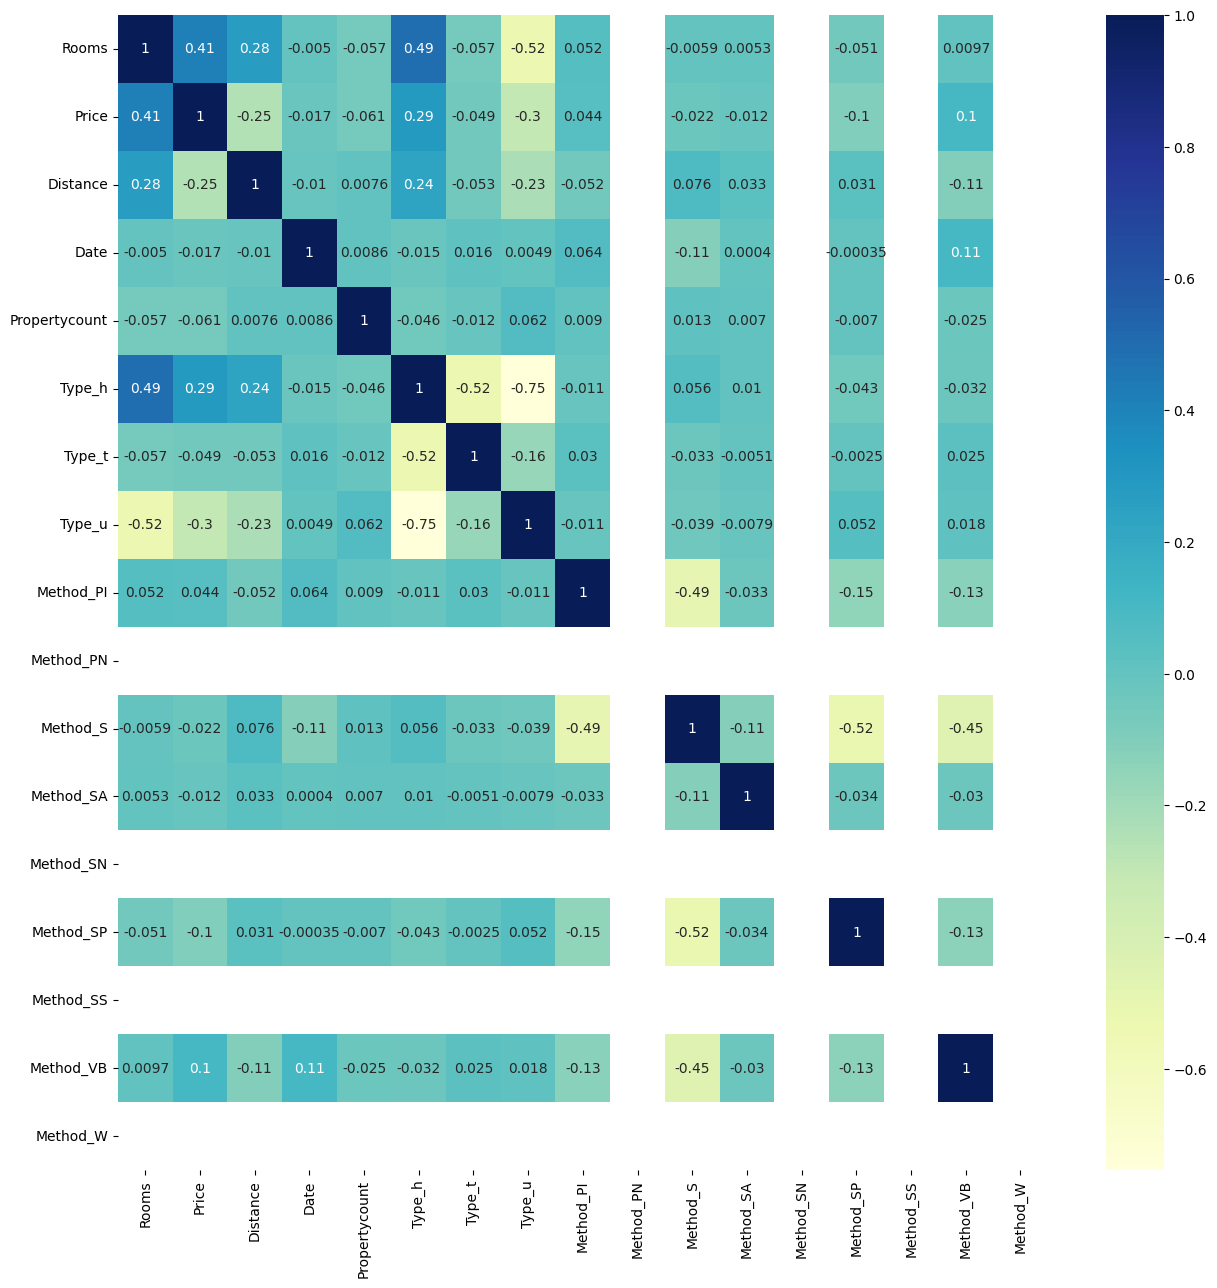

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(onehot_nonull.corr(),annot=True,cmap="YlGnBu")

In [ ]:
onehot_nonull["Method_SS"].value_counts()

Method_SS
False    48433
Name: count, dtype: int64

1. Karena tidak terdapat 4 Method maka dipastikan Method yang tersisa merupakan bukan 4 Method tersebut
2. 4 Method tersebut antara lain:
 * Method_PN
 * Method_SN
 * Method_SS
 * Method_W

In [ ]:
onehot_nonull.head()

,Rooms,Price,Distance,Date,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,3,1490000.0,3.0,1,4019,True,False,False,False,False,True,False,False,False,False,False,False
1,3,1220000.0,3.0,1,4019,True,False,False,False,False,True,False,False,False,False,False,False
2,3,1420000.0,3.0,1,4019,True,False,False,False,False,True,False,False,False,False,False,False
3,3,1515000.0,7.5,1,1543,True,False,False,False,False,True,False,False,False,False,False,False
4,2,670000.0,10.4,1,3464,True,False,False,False,False,True,False,False,False,False,False,False


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >]],
      dtype=object)

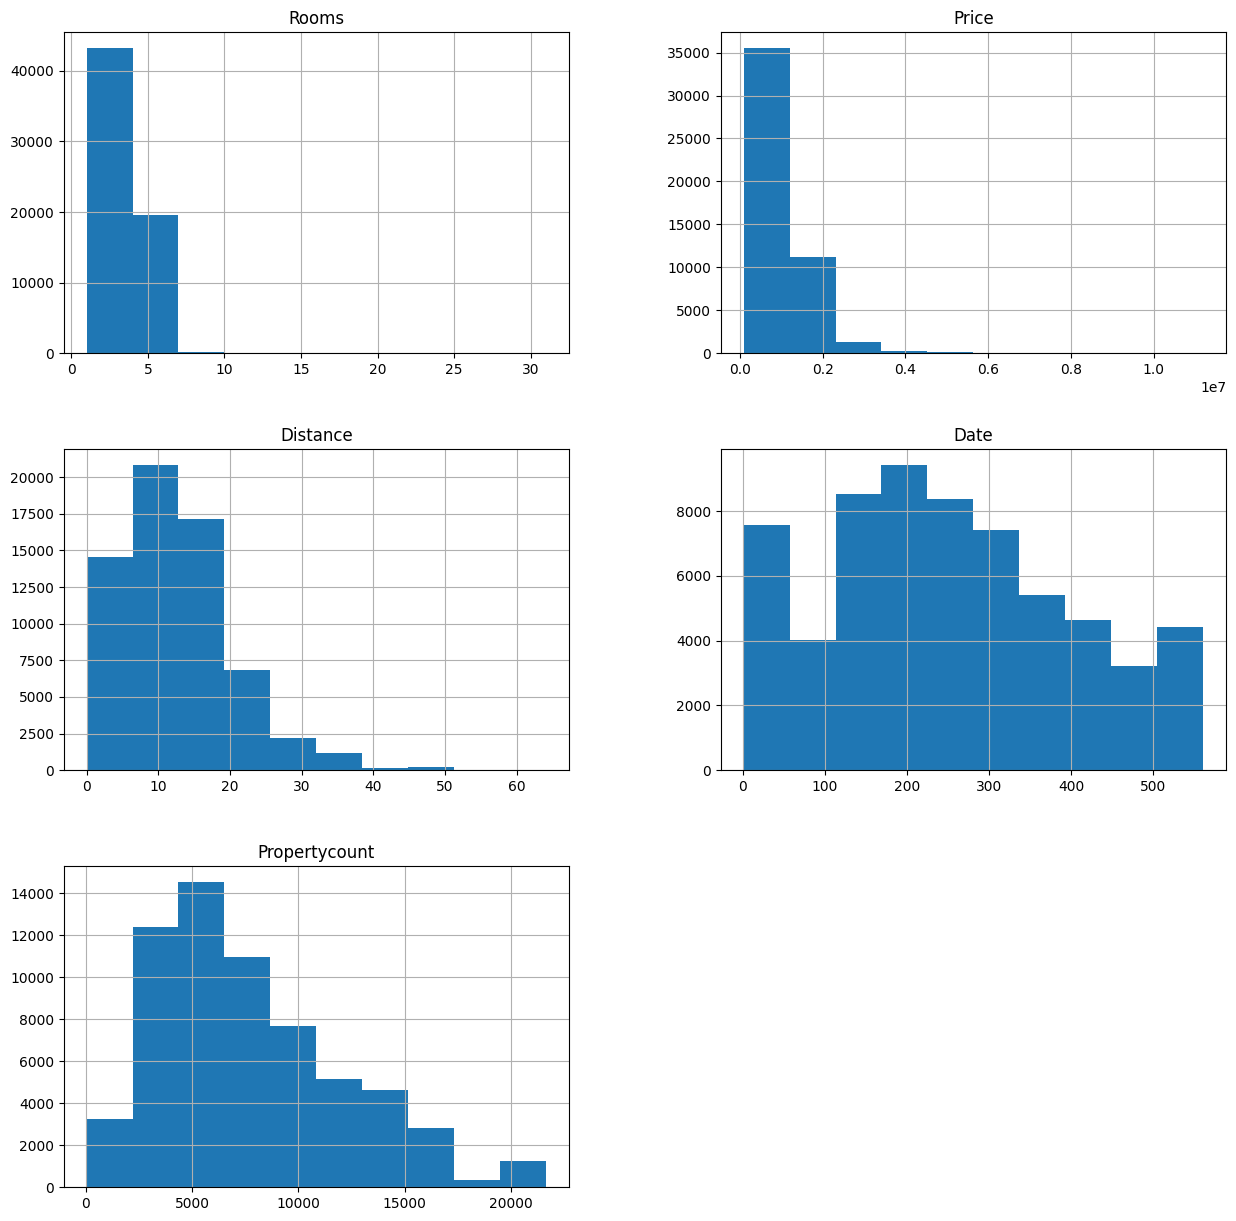

In [ ]:
onehot.hist(figsize=(15,15))

In [ ]:
# Supaya tidak terjadi nilai infinite
onehot_nonull["Distance"]=onehot_nonull["Distance"]+.01

<ipython-input-75-8c8401d2b040>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onehot_nonull["Distance"]=onehot_nonull["Distance"]+.01


In [ ]:
onehot_nonull["Price"]=np.log(onehot_nonull["Price"])
onehot_nonull["Distance"]=np.log(onehot_nonull["Distance"])
onehot_nonull["Propertycount"]=np.log(onehot_nonull["Propertycount"])

<ipython-input-76-f866f1dcfbb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onehot_nonull["Price"]=np.log(onehot_nonull["Price"])
<ipython-input-76-f866f1dcfbb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onehot_nonull["Distance"]=np.log(onehot_nonull["Distance"])
<ipython-input-76-f866f1dcfbb0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
onehot_nonull.head()

,Rooms,Price,Distance,Date,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,3,14.214287,1.101940,1,8.298788,True,False,False,False,False,True,False,False,False,False,False,False
1,3,14.014361,1.101940,1,8.298788,True,False,False,False,False,True,False,False,False,False,False,False
2,3,14.166167,1.101940,1,8.298788,True,False,False,False,False,True,False,False,False,False,False,False
3,3,14.230926,2.016235,1,7.341484,True,False,False,False,False,True,False,False,False,False,False,False
4,2,13.415033,2.342767,1,8.150179,True,False,False,False,False,True,False,False,False,False,False,False


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>],
       [<Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >]],
      dtype=object)

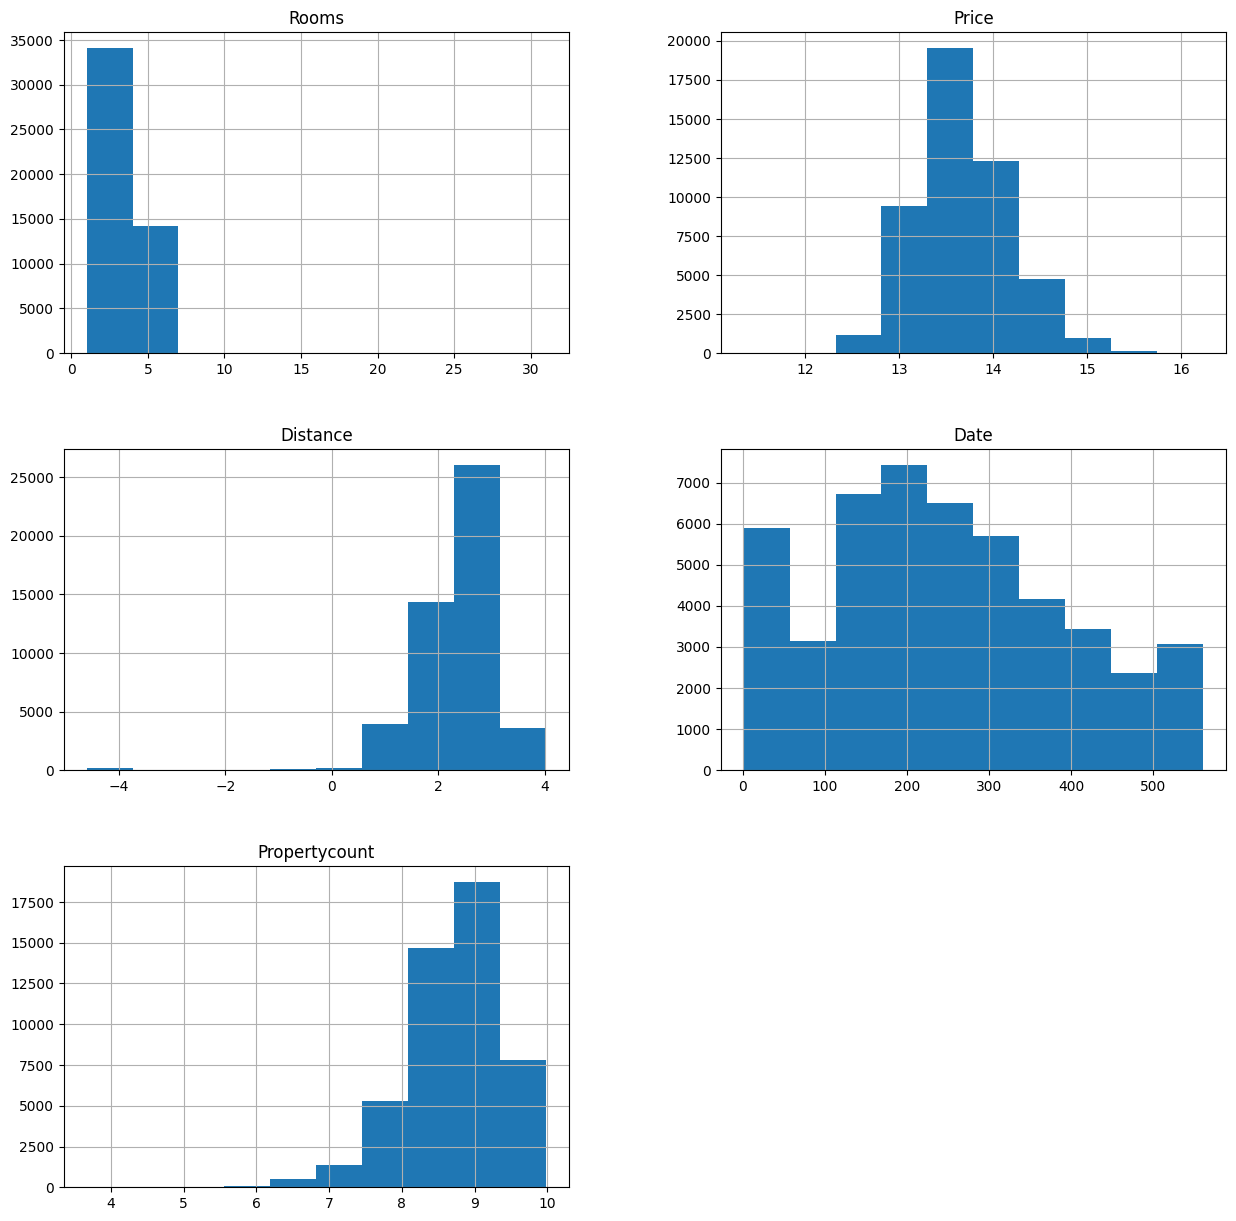

In [ ]:
onehot_nonull.hist(figsize=(15,15))

In [ ]:
np.isfinite(onehot_nonull).sum()

Rooms            48433
Price            48433
Distance         48433
Date             48433
Propertycount    48433
Type_h           48433
Type_t           48433
Type_u           48433
Method_PI        48433
Method_PN        48433
Method_S         48433
Method_SA        48433
Method_SN        48433
Method_SP        48433
Method_SS        48433
Method_VB        48433
Method_W         48433
dtype: int64

# EDA NULL Data

In [ ]:
Null_dataset=dataset[["Rooms","Type","Method","Price","Distance","Date","Propertycount"]]

In [ ]:
Null_dataset=Null_dataset[Null_dataset.isnull().any(axis=1)]

In [ ]:
Null_dataset.head()

,Rooms,Type,Method,Price,Distance,Date,Propertycount
8,6,h,PI,NaN,14.0,1,1899
15,4,h,SN,NaN,15.5,1,7630
24,4,h,S,NaN,10.2,1,3052
29,4,h,SN,NaN,16.5,1,1130
38,3,h,SP,NaN,9.7,1,7809


In [ ]:
onehot_null=pd.get_dummies(Null_dataset)

In [ ]:
onehot_null.head()

,Rooms,Price,Distance,Date,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
8,6,NaN,14.0,1,1899,True,False,False,True,False,False,False,False,False,False,False,False
15,4,NaN,15.5,1,7630,True,False,False,False,False,False,False,True,False,False,False,False
24,4,NaN,10.2,1,3052,True,False,False,False,False,True,False,False,False,False,False,False
29,4,NaN,16.5,1,1130,True,False,False,False,False,False,False,True,False,False,False,False
38,3,NaN,9.7,1,7809,True,False,False,False,False,False,False,False,True,False,False,False


<Axes: >

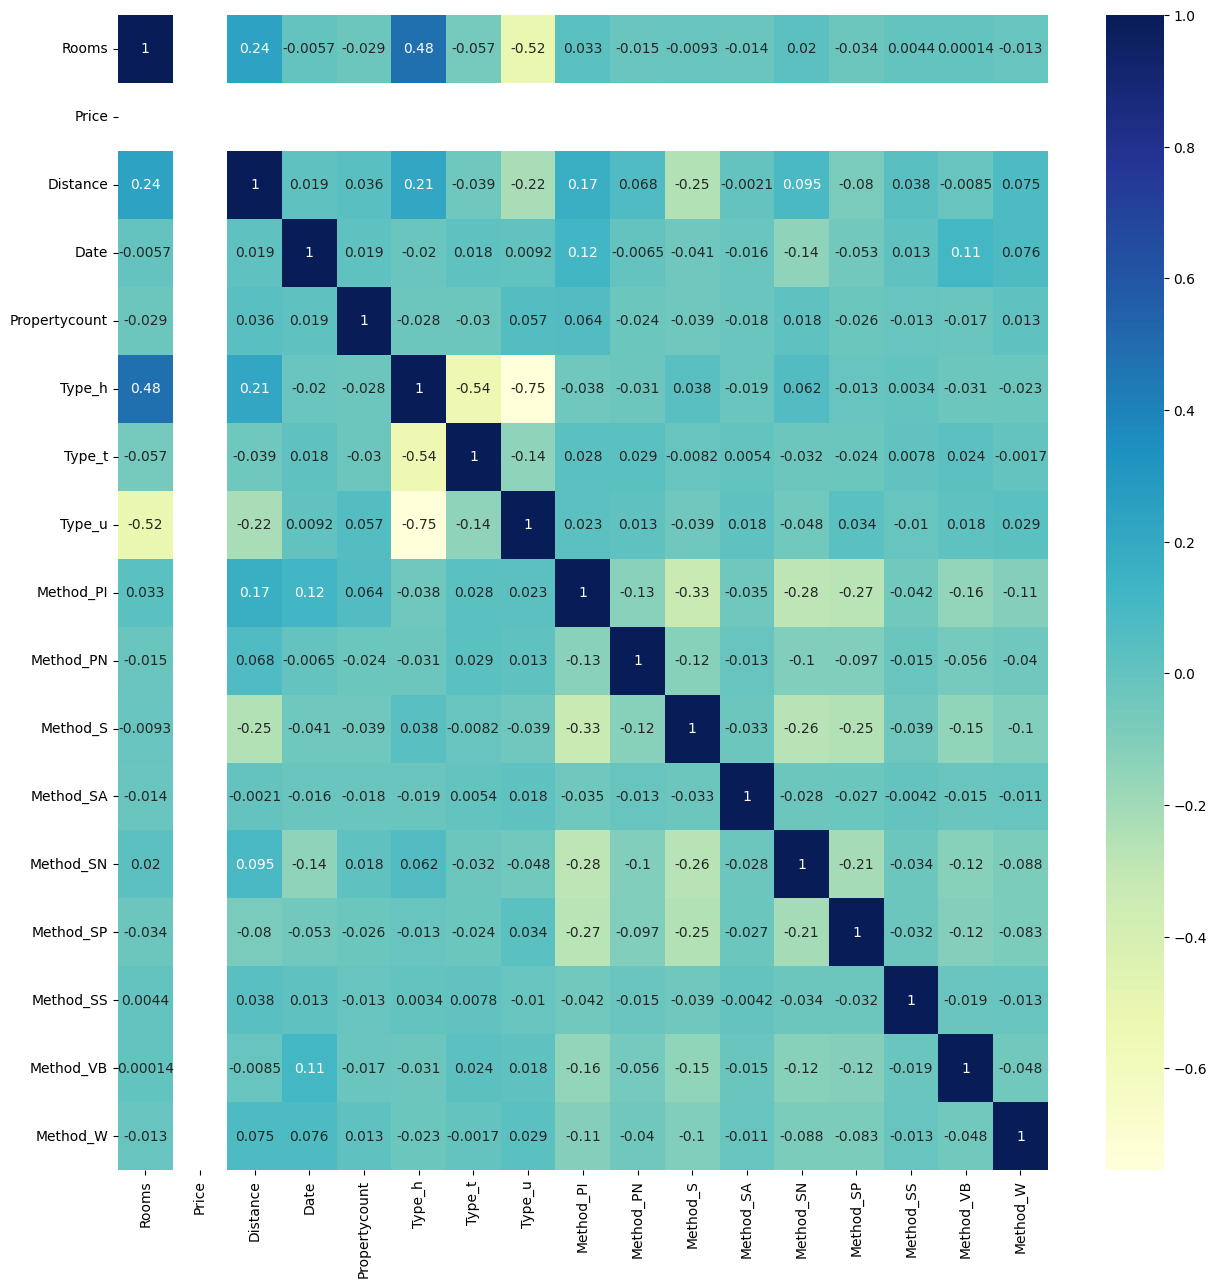

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(onehot_null.corr(),annot=True,cmap="YlGnBu")

# Mencoba Skenario 1 (Imputasi dari prediksi Model No Null Data)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Model Linear Regression

In [ ]:
X_train, x_test, y_train, y_test =train_test_split(onehot_nonull.drop(["Price"],axis=1),onehot_nonull["Price"],test_size=0.2,random_state=42)

In [ ]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
linear_model.score(x_test,y_test)

0.37941115418330695

## Model Ridge Regression

In [ ]:
ridge_model=Ridge(alpha=6)
ridge_model.fit(X_train,y_train)

Ridge(alpha=6)

In [ ]:
ridge_model.score(x_test,y_test)

0.37941750628031756

## Model Random Forest

In [ ]:
forest=RandomForestRegressor(n_estimators=500, random_state=42)
forest.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [ ]:
forest.score(x_test,y_test)

0.7525988344815154

### Imputasi Random Forest Prediction

In [ ]:
null_prediction=forest.predict(onehot_null.drop(["Price"],axis=1))

In [ ]:
onehot_null["Price"].head()

8    NaN
15   NaN
24   NaN
29   NaN
38   NaN
Name: Price, dtype: float64

In [ ]:
# IMPUTASI DENGAN PREDIKSI
onehot_null["Price"]=null_prediction

In [ ]:
onehot_null.head()

,Rooms,Price,Distance,Date,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
8,6,13.317597,14.0,1,1899,True,False,False,True,False,False,False,False,False,False,False,False
15,4,13.059635,15.5,1,7630,True,False,False,False,False,False,False,True,False,False,False,False
24,4,13.000683,10.2,1,3052,True,False,False,False,False,True,False,False,False,False,False,False
29,4,13.059635,16.5,1,1130,True,False,False,False,False,False,False,True,False,False,False,False
38,3,12.870569,9.7,1,7809,True,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
merged_data=pd.concat([onehot_nonull,onehot_null])
merged_data.head()

,Rooms,Price,Distance,Date,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,3,14.214287,1.101940,1,8.298788,True,False,False,False,False,True,False,False,False,False,False,False
1,3,14.014361,1.101940,1,8.298788,True,False,False,False,False,True,False,False,False,False,False,False
2,3,14.166167,1.101940,1,8.298788,True,False,False,False,False,True,False,False,False,False,False,False
3,3,14.230926,2.016235,1,7.341484,True,False,False,False,False,True,False,False,False,False,False,False
4,2,13.415033,2.342767,1,8.150179,True,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63023 entries, 0 to 63022
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          63023 non-null  int64  
 1   Price          63023 non-null  float64
 2   Distance       63023 non-null  float64
 3   Date           63023 non-null  int64  
 4   Propertycount  63023 non-null  float64
 5   Type_h         63023 non-null  bool   
 6   Type_t         63023 non-null  bool   
 7   Type_u         63023 non-null  bool   
 8   Method_PI      63023 non-null  bool   
 9   Method_PN      63023 non-null  bool   
 10  Method_S       63023 non-null  bool   
 11  Method_SA      63023 non-null  bool   
 12  Method_SN      63023 non-null  bool   
 13  Method_SP      63023 non-null  bool   
 14  Method_SS      63023 non-null  bool   
 15  Method_VB      63023 non-null  bool   
 16  Method_W       63023 non-null  bool   
dtypes: bool(12), float64(3), int64(2)
memory usage: 3.6 MB


In [ ]:
train_rfd, test_rfd, target_train_rfd, target_test_rfd = train_test_split(merged_data.drop(["Price"],axis=1),merged_data["Price"], test_size=0.2, random_state=42)

In [ ]:
merged_forest=RandomForestRegressor(n_estimators=500, random_state=42)
merged_forest.fit(train_rfd,target_train_rfd)

RandomForestRegressor(n_estimators=500, random_state=42)

In [ ]:
merged_forest.score(test_rfd,target_test_rfd)

0.82391507269913

# Mencoba Skenario 2 (Imputasi KNN dan Iterative Imputer)

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          63023 non-null  int64  
 1   Price          48433 non-null  float64
 2   Distance       63023 non-null  float64
 3   Date           63023 non-null  int64  
 4   Propertycount  63023 non-null  int64  
 5   Type_h         63023 non-null  bool   
 6   Type_t         63023 non-null  bool   
 7   Type_u         63023 non-null  bool   
 8   Method_PI      63023 non-null  bool   
 9   Method_PN      63023 non-null  bool   
 10  Method_S       63023 non-null  bool   
 11  Method_SA      63023 non-null  bool   
 12  Method_SN      63023 non-null  bool   
 13  Method_SP      63023 non-null  bool   
 14  Method_SS      63023 non-null  bool   
 15  Method_VB      63023 non-null  bool   
 16  Method_W       63023 non-null  bool   
dtypes: bool(12), float64(2), int64(3)
memory usage: 3.

## KNN Imputer

In [ ]:
knnimputer=KNNImputer(n_neighbors=5)
knnimputer.fit(onehot)

KNNImputer()

In [ ]:
onehot_knn=knnimputer.transform(onehot)

In [ ]:
onehot_knn=pd.DataFrame(onehot_knn,columns=onehot.columns)

In [ ]:
onehot_knn.head()

,Rooms,Price,Distance,Date,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,3.0,1490000.0,3.0,1.0,4019.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1220000.0,3.0,1.0,4019.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1420000.0,3.0,1.0,4019.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,1515000.0,7.5,1.0,1543.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,670000.0,10.4,1.0,3464.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
onehot.head()

,Rooms,Price,Distance,Date,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_PN,Method_S,Method_SA,Method_SN,Method_SP,Method_SS,Method_VB,Method_W
0,3,1490000.0,3.0,1,4019,True,False,False,False,False,True,False,False,False,False,False,False
1,3,1220000.0,3.0,1,4019,True,False,False,False,False,True,False,False,False,False,False,False
2,3,1420000.0,3.0,1,4019,True,False,False,False,False,True,False,False,False,False,False,False
3,3,1515000.0,7.5,1,1543,True,False,False,False,False,True,False,False,False,False,False,False
4,2,670000.0,10.4,1,3464,True,False,False,False,False,True,False,False,False,False,False,False


In [ ]:
# Supaya tidak terjadi nilai infinite
onehot_knn["Distance"]=onehot_knn["Distance"]+.01

# Persebaran Gaussian
onehot_knn["Price"]=np.log(onehot_knn["Price"])
onehot_knn["Distance"]=np.log(onehot_knn["Distance"])
onehot_knn["Propertycount"]=np.log(onehot_knn["Propertycount"])

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Propertycount'}>,
        <Axes: title={'center': 'Type_h'}>,
        <Axes: title={'center': 'Type_t'}>,
        <Axes: title={'center': 'Type_u'}>],
       [<Axes: title={'center': 'Method_PI'}>,
        <Axes: title={'center': 'Method_PN'}>,
        <Axes: title={'center': 'Method_S'}>,
        <Axes: title={'center': 'Method_SA'}>],
       [<Axes: title={'center': 'Method_SN'}>,
        <Axes: title={'center': 'Method_SP'}>,
        <Axes: title={'center': 'Method_SS'}>,
        <Axes: title={'center': 'Method_VB'}>],
       [<Axes: title={'center': 'Method_W'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

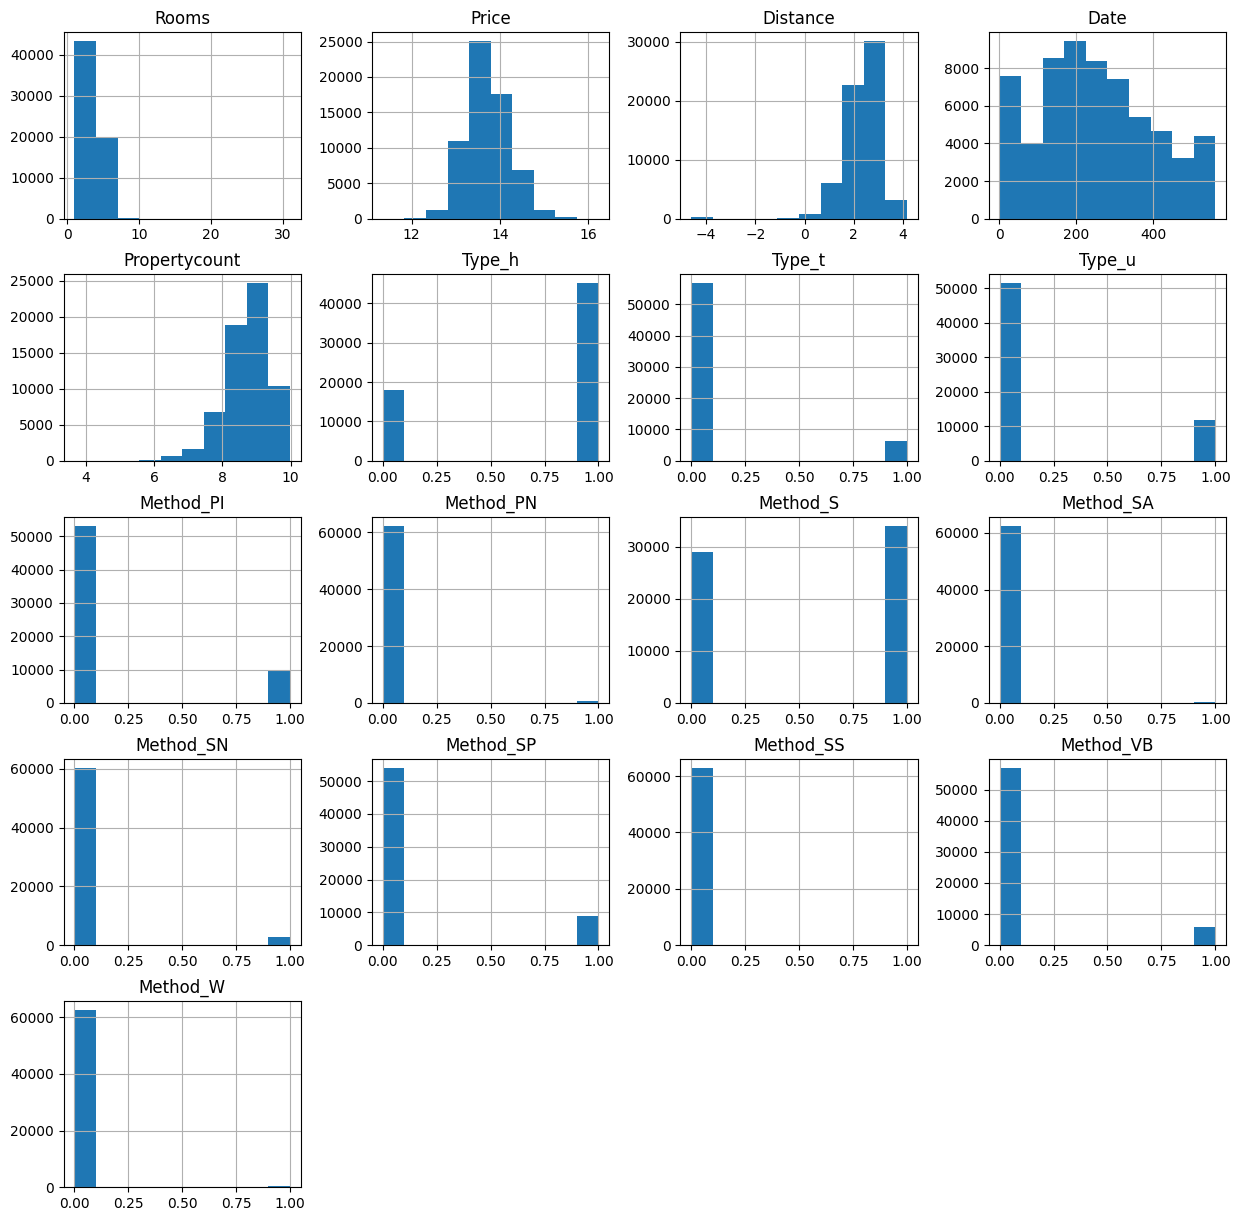

In [ ]:
onehot_knn.hist(figsize=(15,15))

### Make Prediction From Imputation

#### Linear Regression

In [ ]:
knn_train, knn_test, target_knn_train, target_knn_test = train_test_split(onehot_knn.drop(["Price"],axis=1),onehot_knn["Price"], test_size=0.2, random_state=42)

In [ ]:
linear_model_knn=LinearRegression()
linear_model_knn.fit(knn_train,target_knn_train)

LinearRegression()

In [ ]:
linear_model_knn.score(knn_test,target_knn_test)

0.2841860098342728

#### Ridge Regression

In [ ]:
ridge_model_knn=Ridge(alpha=2)
ridge_model_knn.fit(knn_train,target_knn_train)

Ridge(alpha=2)

In [ ]:
ridge_model_knn.score(knn_test,target_knn_test)

0.2841903598240325

#### Random Forest Regression

In [ ]:
forest_knn=RandomForestRegressor(n_estimators=500, random_state=42)
forest_knn.fit(knn_train,target_knn_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [ ]:
forest_knn.score(knn_test,target_knn_test)

0.7234357206639928

## Iterative Imputer

In [ ]:
iterative_imputer=IterativeImputer(random_state=42)
iterative_imputer.fit(onehot)

IterativeImputer(random_state=42)

In [ ]:
onehot_iterative=iterative_imputer.transform(onehot)

In [ ]:
onehot_iterative=pd.DataFrame(onehot_iterative,columns=onehot.columns)

In [ ]:
# Supaya tidak terjadi nilai infinite
onehot_iterative["Distance"]=onehot_iterative["Distance"]+.01

onehot_iterative["Price"]=np.log(onehot_iterative["Price"])
onehot_iterative["Distance"]=np.log(onehot_iterative["Distance"])
onehot_iterative["Propertycount"]=np.log(onehot_iterative["Propertycount"])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
onehot_iterative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          63023 non-null  float64
 1   Price          62966 non-null  float64
 2   Distance       63023 non-null  float64
 3   Date           63023 non-null  float64
 4   Propertycount  63023 non-null  float64
 5   Type_h         63023 non-null  float64
 6   Type_t         63023 non-null  float64
 7   Type_u         63023 non-null  float64
 8   Method_PI      63023 non-null  float64
 9   Method_PN      63023 non-null  float64
 10  Method_S       63023 non-null  float64
 11  Method_SA      63023 non-null  float64
 12  Method_SN      63023 non-null  float64
 13  Method_SP      63023 non-null  float64
 14  Method_SS      63023 non-null  float64
 15  Method_VB      63023 non-null  float64
 16  Method_W       63023 non-null  float64
dtypes: float64(17)
memory usage: 8.2 MB


In [ ]:
# MENGECEK NILAI NULL PADA DATAFRAME IMPUTASI ITERATIVE

onehot_iterative.isnull().sum()

Rooms             0
Price            57
Distance          0
Date              0
Propertycount     0
Type_h            0
Type_t            0
Type_u            0
Method_PI         0
Method_PN         0
Method_S          0
Method_SA         0
Method_SN         0
Method_SP         0
Method_SS         0
Method_VB         0
Method_W          0
dtype: int64

In [ ]:
onehot_iterative.dropna(inplace=True)

array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Propertycount'}>,
        <Axes: title={'center': 'Type_h'}>,
        <Axes: title={'center': 'Type_t'}>,
        <Axes: title={'center': 'Type_u'}>],
       [<Axes: title={'center': 'Method_PI'}>,
        <Axes: title={'center': 'Method_PN'}>,
        <Axes: title={'center': 'Method_S'}>,
        <Axes: title={'center': 'Method_SA'}>],
       [<Axes: title={'center': 'Method_SN'}>,
        <Axes: title={'center': 'Method_SP'}>,
        <Axes: title={'center': 'Method_SS'}>,
        <Axes: title={'center': 'Method_VB'}>],
       [<Axes: title={'center': 'Method_W'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

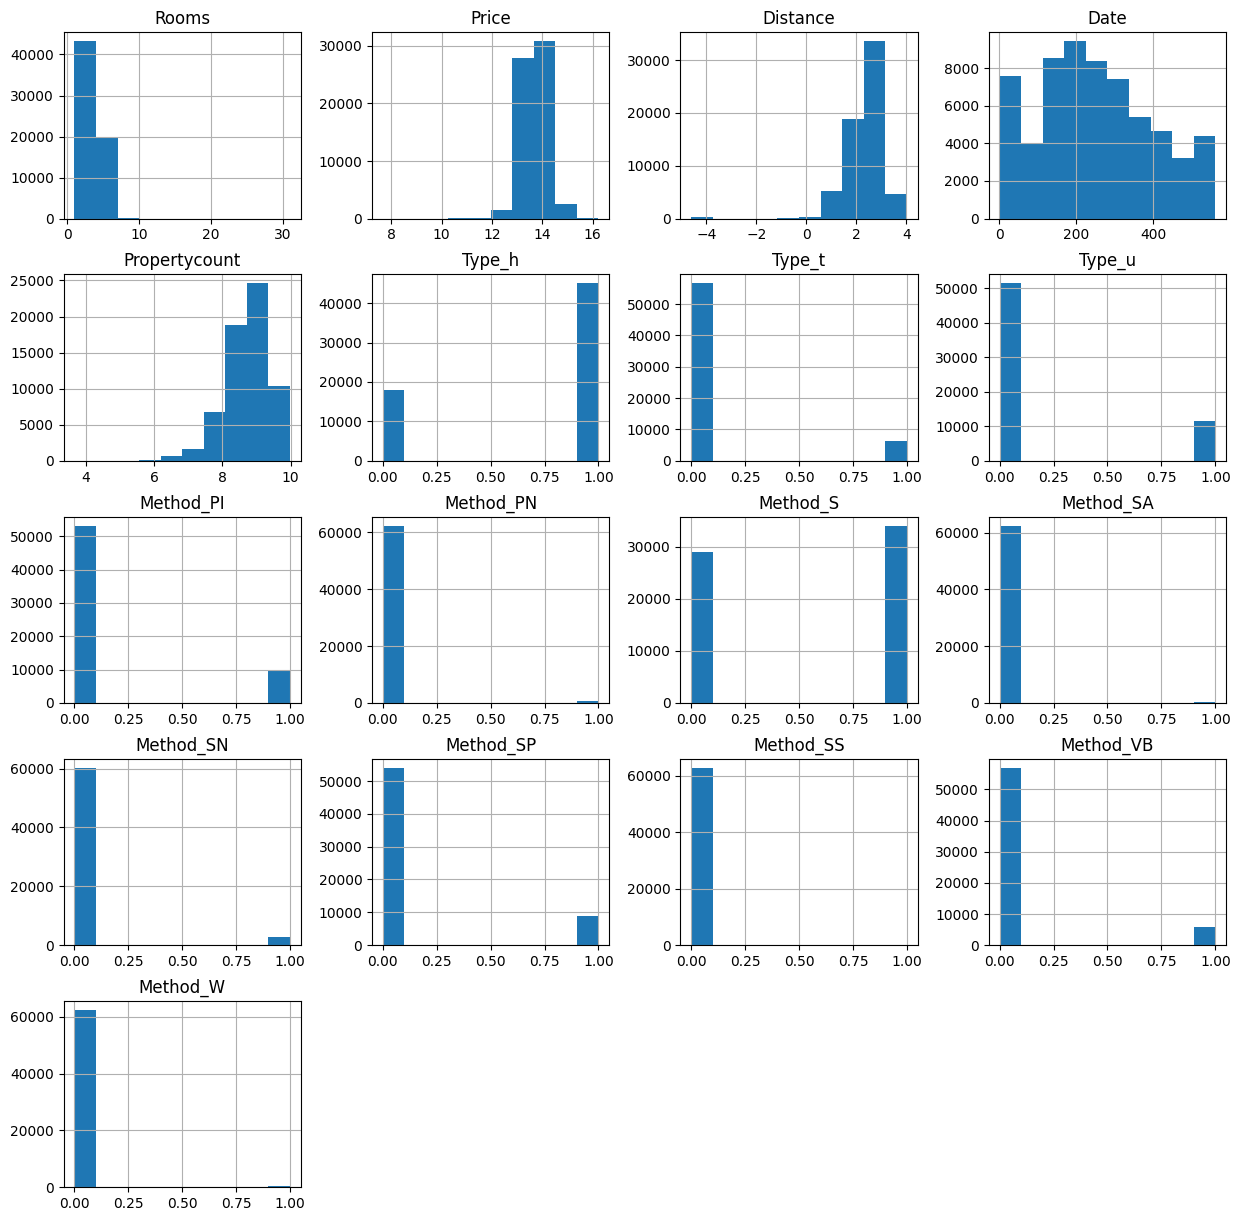

In [ ]:
onehot_iterative.hist(figsize=(15,15))

In [ ]:
iterative_train, iterative_test, target_iterative_train, target_iterative_test = train_test_split(onehot_iterative.drop(["Price"],axis=1),onehot_iterative["Price"], test_size=0.2, random_state=42)

### Make Prediction From Imputation

#### Linear Regression

In [ ]:
iterative_linear=LinearRegression()
iterative_linear.fit(iterative_train,target_iterative_train)

LinearRegression()

In [ ]:
iterative_linear.score(iterative_test,target_iterative_test)

0.44589896004904694

#### Random Forest Regression

In [ ]:
iterative_forest=RandomForestRegressor(n_estimators=500, random_state=42)
iterative_forest.fit(iterative_train,target_iterative_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [ ]:
iterative_forest.score(iterative_test,target_iterative_test)

0.7313989936131176

#### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
Ridge_iterative=Ridge(alpha=1)
Ridge_iterative.fit(iterative_train,target_iterative_train)

Ridge(alpha=1)

In [ ]:
Ridge_iterative.score(iterative_test,target_iterative_test)

0.44589945083181703

# Mencoba Skenario 3 (Imputasi dari Mean dan Median)

## Mean Condition

In [ ]:
mean=onehot_nonull["Price"].mean()
median=onehot_nonull["Price"].median()

In [ ]:
merged_data_thirdd=pd.concat([onehot_nonull,onehot_null])

In [ ]:
merged_data_thirdd.shape

(63023, 17)

In [ ]:
mean_condition=merged_data_thirdd.fillna(mean)

### Random Forest Regression

In [ ]:
mean_train, mean_test, target_mean_train, target_mean_test = train_test_split(mean_condition.drop(["Price"],axis=1),mean_condition["Price"], test_size=0.2, random_state=42)

In [ ]:
forest_mean=RandomForestRegressor(n_estimators=500, random_state=42)
forest_mean.fit(mean_train,target_mean_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [ ]:
forest_mean.score(mean_test,target_mean_test)

0.7551975821667006

## Median Condition

### Random Forest Regression

In [ ]:
median_condition=merged_data_thirdd.fillna(median)

In [ ]:
median_train, median_test, target_median_train, target_median_test = train_test_split(median_condition.drop(["Price"],axis=1),median_condition["Price"], test_size=0.2, random_state=42)

In [ ]:
forest_median=RandomForestRegressor(n_estimators=500, random_state=42)
forest_median.fit(median_train,target_median_train)

RandomForestRegressor(n_estimators=500, random_state=42)

In [ ]:
forest_median.score(median_test,target_median_test)

0.7556489065289524